In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# load dataset
dataset_path = Path("datasets/spotify/data/spotify_dataset.csv")
df = pd.read_csv(dataset_path)
df.head()

,Artist(s),song,text,Length,emotion,Genre,Album,Release Date,Key,Tempo,...,Good for Morning Routine,Similar Artist 1,Similar Song 1,Similarity Score 1,Similar Artist 2,Similar Song 2,Similarity Score 2,Similar Artist 3,Similar Song 3,Similarity Score 3
0,!!!,Even When the Waters Cold,Friends told her she was better off at the bot...,03:47,sadness,hip hop,Thr!!!er,29th April 2013,D min,105,...,0,Corey Smith,If I Could Do It Again,0.986061,Toby Keith,Drinks After Work,0.983719,Space,Neighbourhood,0.983236
1,!!!,One Girl / One Boy,"Well I heard it, playing soft From a drunken b...",04:03,sadness,hip hop,Thr!!!er,29th April 2013,A# min,117,...,0,Hiroyuki Sawano,BRE@TH//LESS,0.995409,When In Rome,Heaven Knows,0.990905,Justice Crew,Everybody,0.984483
2,!!!,Pardon My Freedom,"Oh my god, did I just say that out loud? Shoul...",05:51,joy,hip hop,Louden Up Now,8th June 2004,A Maj,121,...,0,Ricky Dillard,More Abundantly Medley Live,0.993176,Juliet,Avalon,0.965147,The Jacksons,Lovely One,0.956752
3,!!!,Ooo,[Verse 1] Remember when I called you on the te...,03:44,joy,hip hop,As If,16th October 2015,A min,122,...,0,Eric Clapton,Man Overboard,0.992749,Roxette,Don't Believe In Accidents,0.991494,Tiwa Savage,My Darlin,0.990381
4,!!!,Freedom 15,[Verse 1] Calling me like I got something to s...,06:00,joy,hip hop,As If,16th October 2015,F min,123,...,0,Cibo Matto,Lint Of Love,0.981610,Barrington Levy,Better Than Gold,0.981524,Freestyle,Its Automatic,0.981415


In [3]:
# list all columsn in the dataframe
print("Columns in the DataFrame:")
for column in df.columns:
    print(column)

Columns in the DataFrame:
Artist(s)
song
text
Length
emotion
Genre
Album
Release Date
Key
Tempo
Loudness (db)
Time signature
Explicit
Popularity
Energy
Danceability
Positiveness
Speechiness
Liveness
Acousticness
Instrumentalness
Good for Party
Good for Work/Study
Good for Relaxation/Meditation
Good for Exercise
Good for Running
Good for Yoga/Stretching
Good for Driving
Good for Social Gatherings
Good for Morning Routine
Similar Artist 1
Similar Song 1
Similarity Score 1
Similar Artist 2
Similar Song 2
Similarity Score 2
Similar Artist 3
Similar Song 3
Similarity Score 3


In [4]:
# remove all columns but text emotion Genre
df = df[["text", "emotion", "Genre"]]
# remove all rows with NaN values
df = df.dropna()
# remove all rows with empty text
df = df[df["text"].str.strip() != ""]
# remove all rows with empty emotion
df = df[df["emotion"].str.strip() != ""]
# remove all rows with empty Genre
df = df[df["Genre"].str.strip() != ""]

In [5]:
# remove underused emotions which are:
underused_emotions = ["True", "Love", "pink", "thirst", "angry", "confusion", "interest", "surprise"]
df = df[~df["emotion"].isin(underused_emotions)]

In [6]:
# only keep the top genres which are
top_genres = ["hip hop", "pop", "rock", "jazz", "country", "classical", "gospel", "comedy", "folk", "reggae"]
df = df[df["Genre"].isin(top_genres)]

In [7]:
# rename Genre to genre
df = df.rename(columns={"Genre": "genre"})

In [8]:
# Print some statistics about the DataFrame

# length of the dataframe
print(f"Number of rows in the DataFrame: {len(df)}")

# number of unique emotions
print(f"Number of unique emotions: {df['emotion'].nunique()}")

# number of unique genres
print(f"Number of unique genres: {df['genre'].nunique()}")

Number of rows in the DataFrame: 296078
Number of unique emotions: 5
Number of unique genres: 10


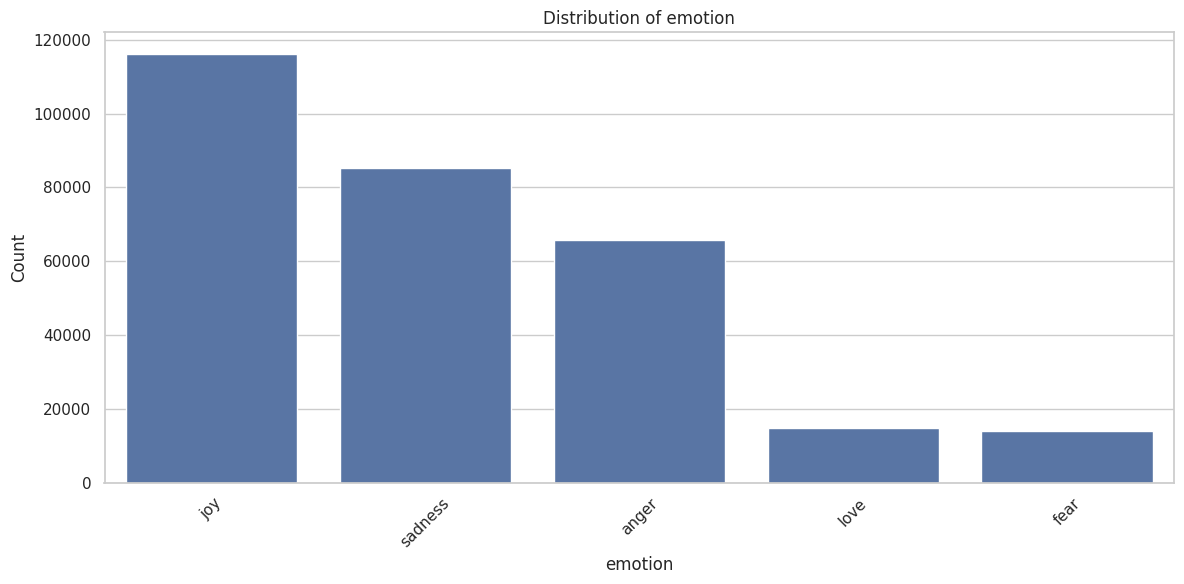

In [9]:
def plot_column_distribution(dataframe, column_name):
    """
    Plots the distribution of a specified column in the DataFrame.
    Args:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to plot.
    """
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))
    sns.countplot(data=dataframe, x=column_name, order=dataframe[column_name].value_counts().index)
    plt.title(f"Distribution of {column_name}")
    plt.xlabel(column_name)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_column_distribution(df, "emotion")

In [10]:
def print_column_counts(dataframe, column_name):
    counts = dataframe[column_name].value_counts()
    for value, count in counts.items():
        print(f"{column_name}: {value}, Count: {count}")

print_column_counts(df, "emotion")

emotion: joy, Count: 116210
emotion: sadness, Count: 85332
emotion: anger, Count: 65711
emotion: love, Count: 14832
emotion: fear, Count: 13993


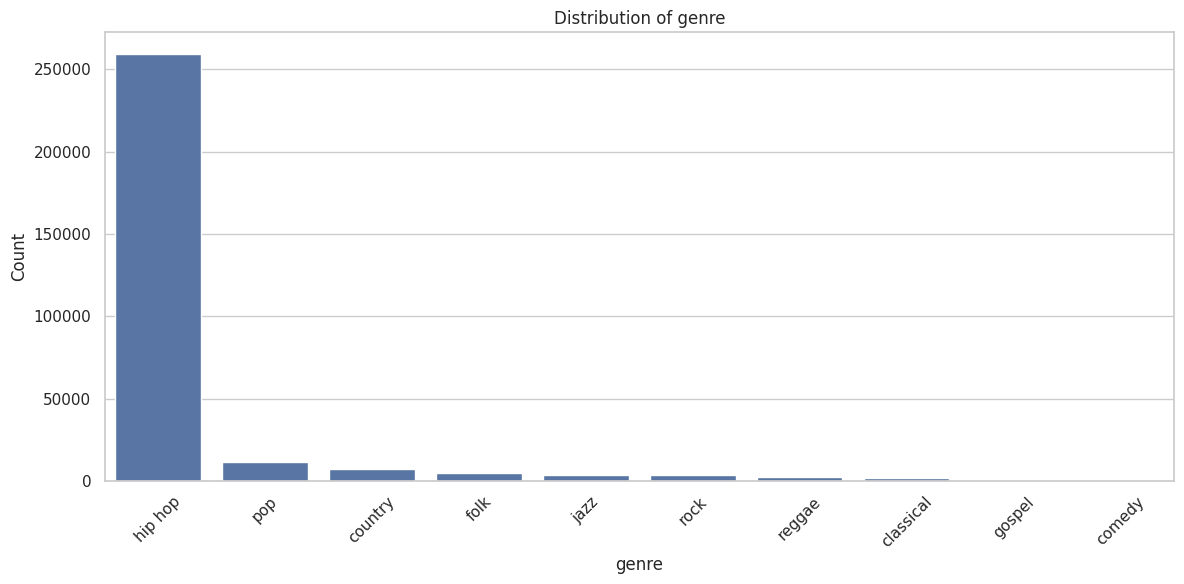

In [11]:
plot_column_distribution(df, "genre")

In [12]:
print_column_counts(df, "genre")

genre: hip hop, Count: 259380
genre: pop, Count: 11364
genre: country, Count: 7310
genre: folk, Count: 4853
genre: jazz, Count: 3865
genre: rock, Count: 3424
genre: reggae, Count: 2598
genre: classical, Count: 1592
genre: gospel, Count: 862
genre: comedy, Count: 830


In [13]:
# Sample the dataframe, so that each genre occurs exactly N times
def sample_genre(df, genre, n):
    genre_df = df[df["genre"] == genre]
    if len(genre_df) < n:
        return genre_df
    return genre_df.sample(n=n, random_state=42)

sampled_df = pd.concat([sample_genre(df, genre, n=800) for genre in top_genres], ignore_index=True)

In [14]:
# Split the sampled dataframe into train and test sets
train_df, test_df = train_test_split(
    sampled_df,
    test_size=5/8,
    random_state=40,
    stratify=sampled_df["genre"]
)

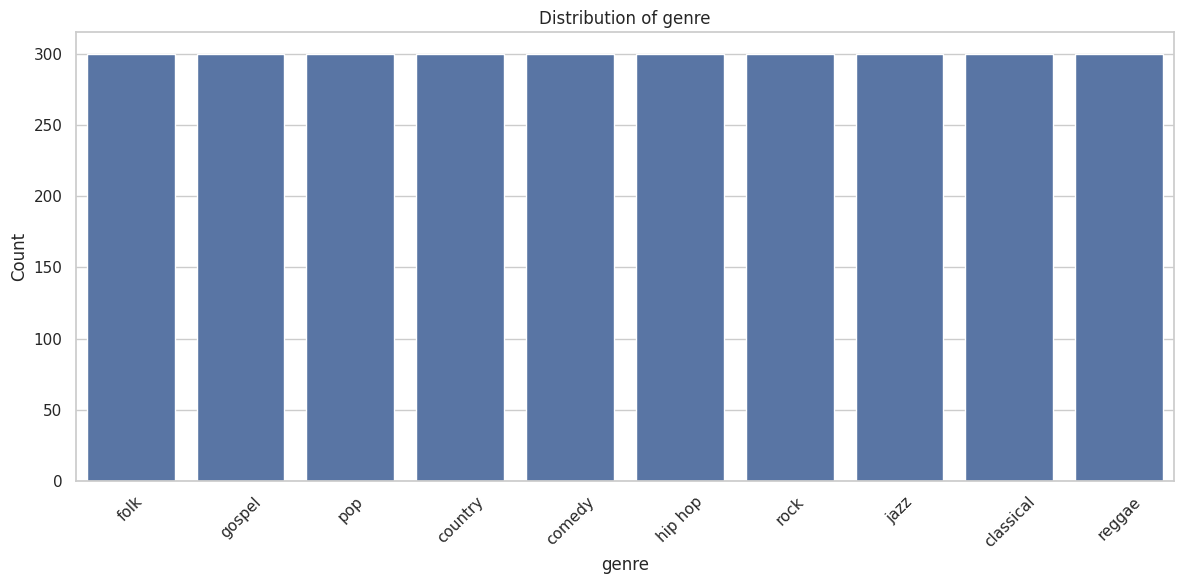

In [15]:
plot_column_distribution(train_df, "genre")

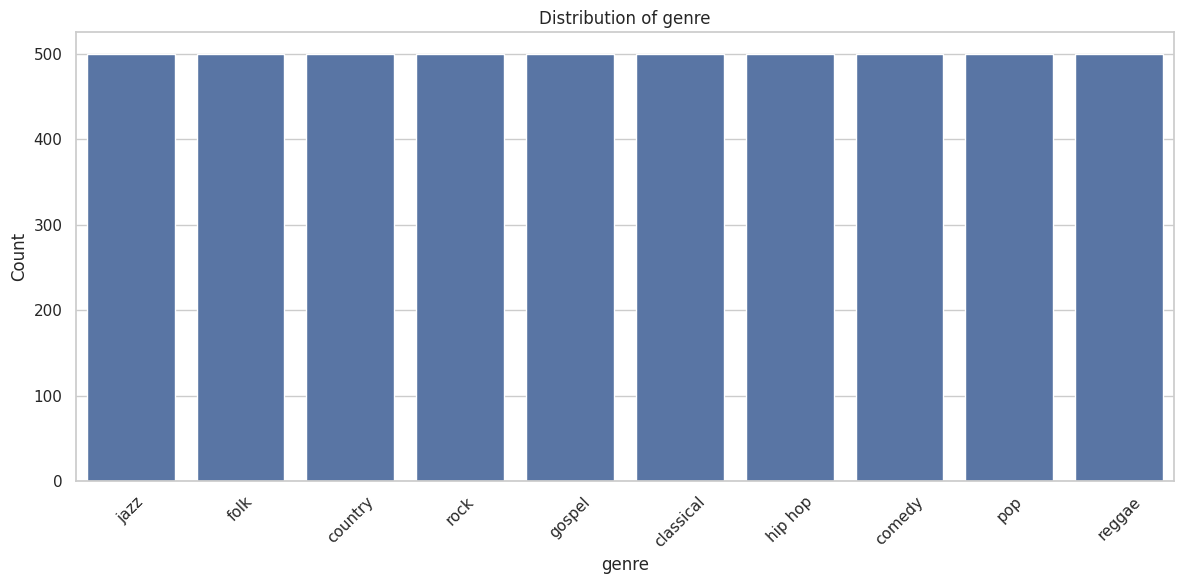

In [16]:
plot_column_distribution(test_df, "genre")

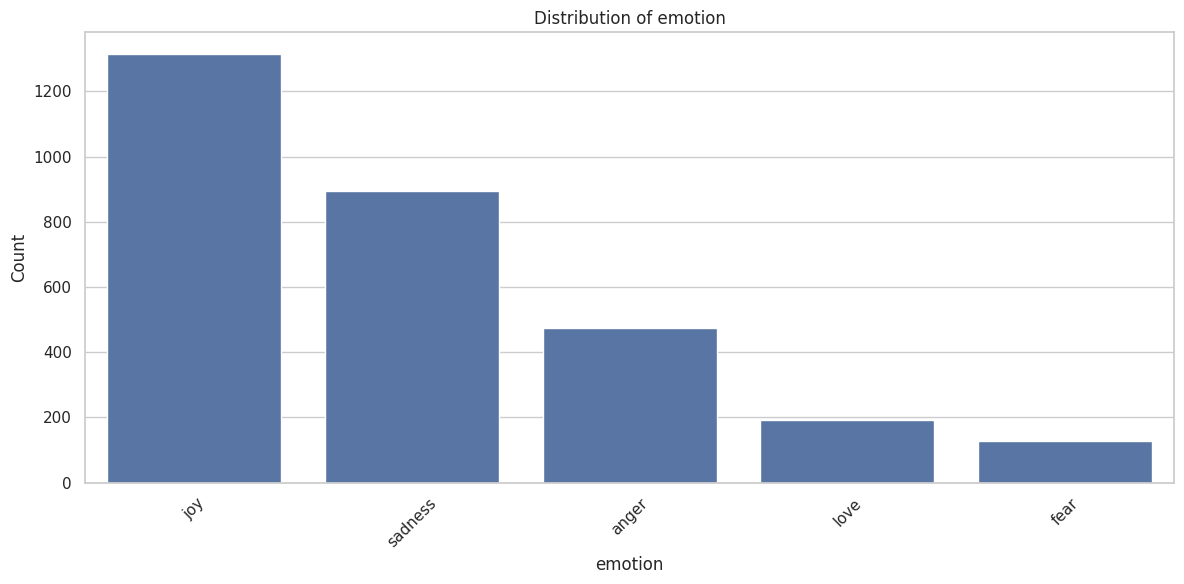

In [17]:
plot_column_distribution(train_df, "emotion")

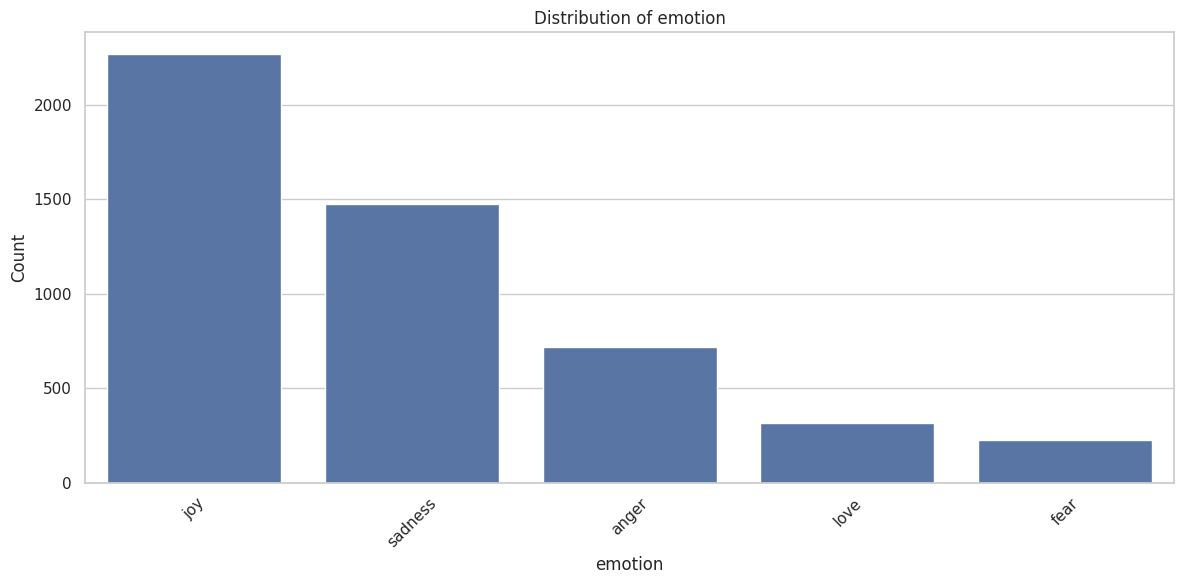

In [18]:
plot_column_distribution(test_df, "emotion")

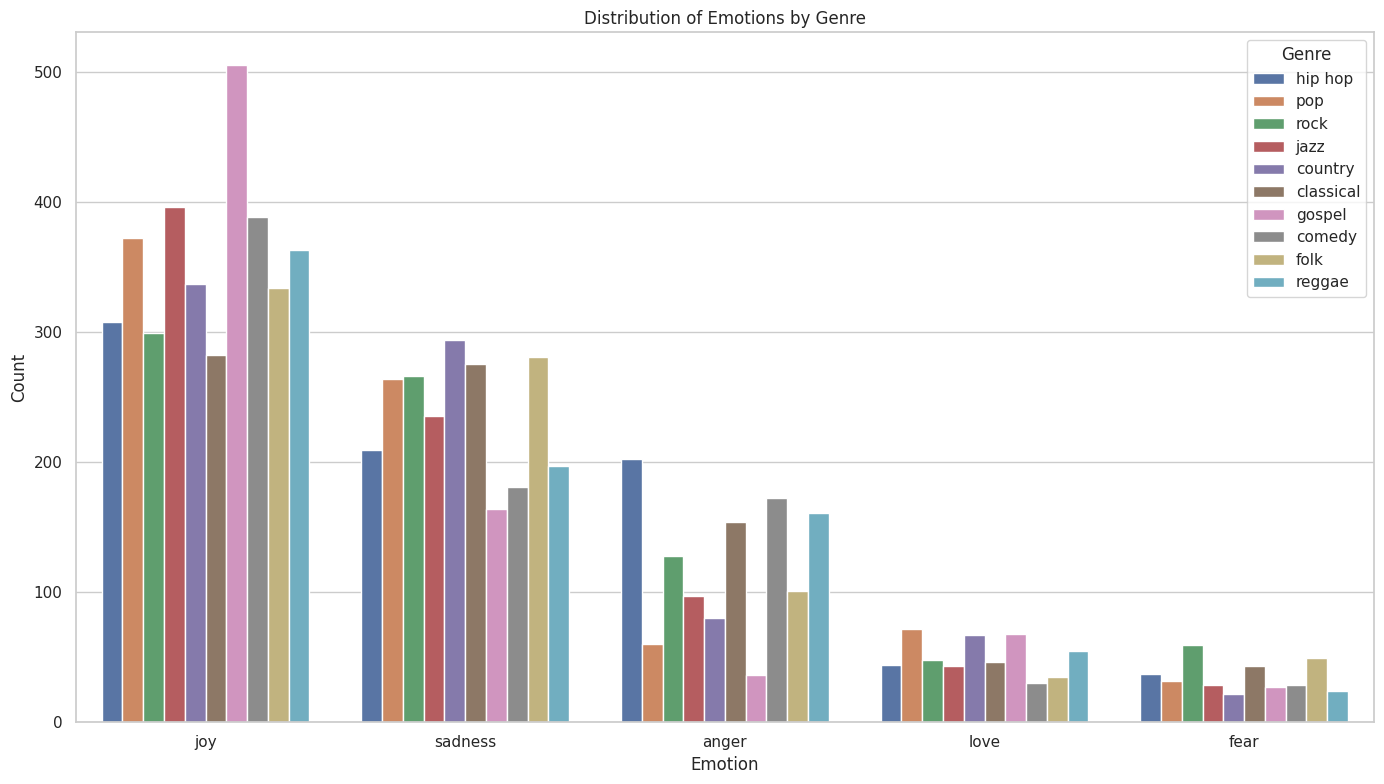

In [19]:
# Plot both emotion and genre distribution together
def plot_emotion_genre_distribution(dataframe):
    plt.figure(figsize=(14, 8))
    sns.countplot(data=dataframe, x="emotion", hue="genre", order=dataframe["emotion"].value_counts().index)
    plt.title("Distribution of Emotions by Genre")
    plt.xlabel("Emotion")
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.legend(title="Genre")
    plt.tight_layout()
    plt.show()
plot_emotion_genre_distribution(sampled_df)

In [20]:
# Count the number of rows
print(f"Number of rows in the train DataFrame: {len(train_df)}")
print(f"Number of rows in the test DataFrame: {len(test_df)}")

Number of rows in the train DataFrame: 3000
Number of rows in the test DataFrame: 5000


In [ ]:
# save the sampled dataframe to a new CSV file
parquet_output_path = Path("datasets/spotify/data/spotify_train.parquet")
train_df.to_parquet(parquet_output_path, index=False)
parquet_output_path = Path("datasets/spotify/data/spotify_test.parquet")
test_df.to_parquet(parquet_output_path, index=False)